# Estadistica Descriptiva

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import pylab
import pandas as pd
import pathlib
plt.style.use('fivethirtyeight')
import os
from utils import plotUtils
import datetime as dt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [2]:
fname_gas = pathlib.Path().resolve() / "data" / "FuturosGasNatural.csv"
fname_petroleo_brent = pathlib.Path().resolve() / "data" / "FuturosPetroleoBrent.csv"
fname_petroleo_wti = pathlib.Path().resolve() / "data" / "FuturosPetroleoWTI.csv"
fname_carbon = pathlib.Path().resolve() / "data" / "FuturosCarbon.csv"

# carbon https://www.investing.com/commodities/coal-cme-futures-historical-data

In [3]:
gas = pd.read_csv(fname_gas, decimal=',')
petroleo_brent = pd.read_csv(fname_petroleo_brent, decimal=',')
petroleo_wti = pd.read_csv(fname_petroleo_wti, decimal=',')
carbon = pd.read_csv(fname_carbon, decimal='.')

In [4]:
gas

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,8.105,8.135,8.499,7.909,-,"-3,14%"
1,18.05.2022,8.368,8.318,8.548,8.160,"80,72K","0,77%"
2,17.05.2022,8.304,8.016,8.372,8.015,"76,67K","4,37%"
3,16.05.2022,7.956,7.700,8.183,7.663,"93,52K","3,82%"
4,13.05.2022,7.663,7.673,7.919,7.515,"85,04K","-0,98%"
...,...,...,...,...,...,...,...
3717,08.01.2008,7.967,7.909,8.000,7.880,"53,78K","1,12%"
3718,07.01.2008,7.879,7.803,7.940,7.701,"56,68K","0,48%"
3719,04.01.2008,7.841,7.652,7.859,7.500,"61,50K","2,18%"
3720,03.01.2008,7.674,7.873,7.980,7.610,"72,74K","-2,24%"


In [5]:
petroleo_brent

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,111.30,108.10,112.30,105.71,"270,76K","1,88%"
1,18.05.2022,109.25,112.90,114.14,108.39,"244,17K","-3,17%"
2,17.05.2022,112.83,114.26,115.68,111.10,"275,24K","-1,05%"
3,16.05.2022,114.03,112.40,114.77,109.01,"215,80K","1,44%"
4,15.05.2022,112.41,111.80,112.49,111.52,"4,38K","1,07%"
...,...,...,...,...,...,...,...
3725,08.01.2008,95.54,94.77,96.69,94.47,"121,23K","1,22%"
3726,07.01.2008,94.39,96.69,97.48,93.72,"106,50K","-2,48%"
3727,04.01.2008,96.79,97.77,98.00,96.18,"98,47K","-0,83%"
3728,03.01.2008,97.60,97.45,98.50,97.04,"84,86K","-0,25%"


In [6]:
petroleo_wti

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,109.28,105.65,110.14,103.25,-,"-0,28%"
1,18.05.2022,109.59,113.66,115.42,108.46,"103,67K","-2,50%"
2,17.05.2022,112.40,113.87,115.56,111.75,"252,63K","-1,58%"
3,16.05.2022,114.20,110.98,114.90,108.11,"289,13K","3,36%"
4,13.05.2022,110.49,106.65,110.64,106.29,"240,99K","4,11%"
...,...,...,...,...,...,...,...
3718,08.01.2008,96.33,95.35,97.54,95.26,"287,52K","1,30%"
3719,07.01.2008,95.09,97.79,98.40,94.47,"258,89K","-2,88%"
3720,04.01.2008,97.91,99.17,99.41,97.10,"231,79K","-1,28%"
3721,03.01.2008,99.18,99.23,100.09,98.45,"241,27K","-0,44%"


In [7]:
carbon

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 27, 2020",34.05,34.05,34.05,34.05,-,0.00%
1,"Mar 26, 2020",34.05,34.05,34.05,34.05,-,0.00%
2,"Mar 25, 2020",34.05,34.05,34.05,34.05,-,0.00%
3,"Mar 24, 2020",34.05,34.05,34.05,34.05,-,0.00%
4,"Mar 23, 2020",34.05,34.05,34.05,34.05,-,0.00%
...,...,...,...,...,...,...,...
2330,"Feb 28, 2011",70.35,70.35,70.35,70.35,-,0.64%
2331,"Feb 25, 2011",69.90,69.90,69.90,69.90,-,-0.50%
2332,"Feb 24, 2011",70.25,70.25,70.25,70.25,-,-1.06%
2333,"Feb 23, 2011",71.00,71.00,71.00,71.00,-,0.00%


## Last Price of the day

In [8]:
last_price_day_gas = gas["Último"]
last_price_day_petroleo_brent = petroleo_brent["Último"]
last_price_day_petroleo_wti = petroleo_wti["Último"]
last_price_day_carbon = carbon["Price"]

## Evolución Temporal

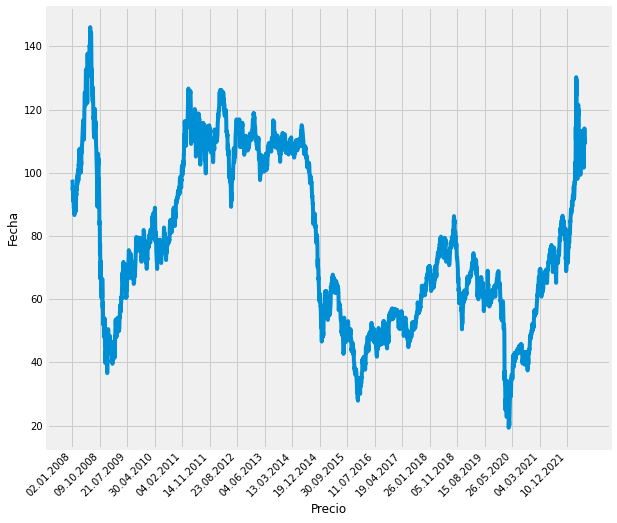

In [9]:
plotUtils.plotFunctionWithDates(last_price_day_petroleo_brent, petroleo_brent["Fecha"], "2008 - 2022", "Precio", "Fecha")

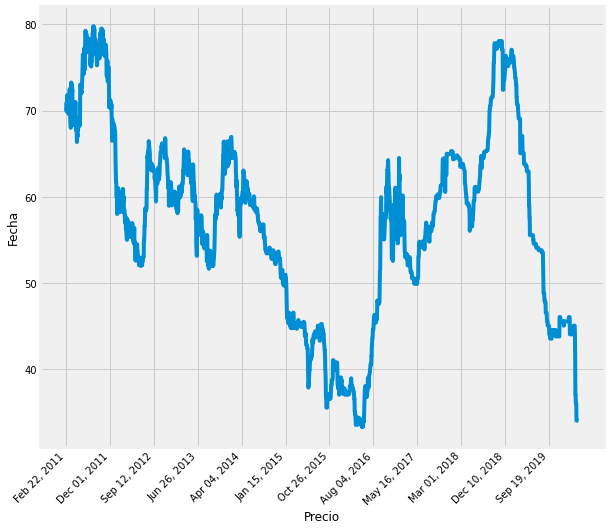

In [10]:
plotUtils.plotFunctionWithDates(last_price_day_carbon, carbon["Date"], "2008 - 2022", "Precio", "Fecha")

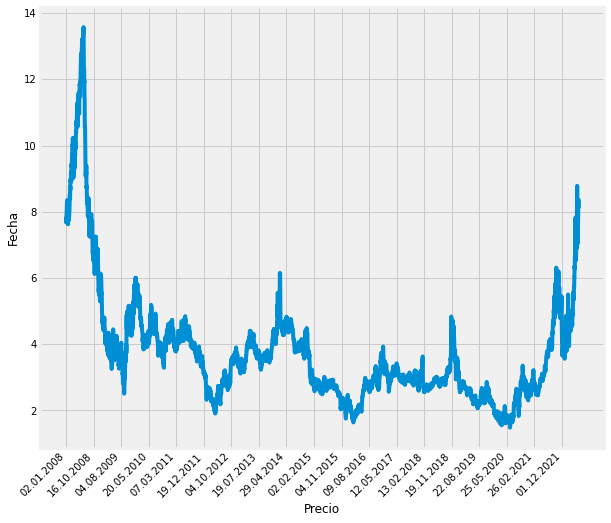

In [11]:
plotUtils.plotFunctionWithDates(last_price_day_gas, gas["Fecha"], "2008 - 2022", "Precio", "Fecha")

## Rendimientos (compund returns)

In [12]:
def compoundReturn(dataFrame):
    array = np.empty(dataFrame.size)
    for i in dataFrame.index:
        array[i] = 100 * np.log10(dataFrame[i+1] / dataFrame[i])
        # remove outsiders
        if np.absolute(array[i]) > 10:
            array[i] = 0
        if (i + 1 == dataFrame.size - 1):
            break
    # Remove last value, outside
    array[-1] = 0
    return array

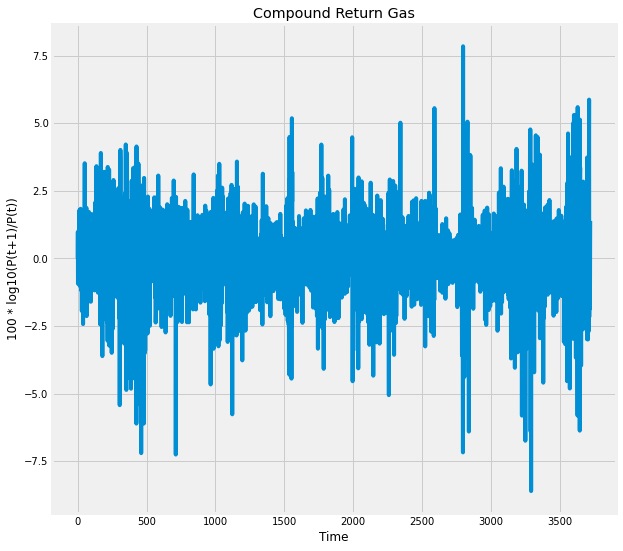

In [13]:
gas_return = compoundReturn(last_price_day_gas)
gas_return[np.logical_not(np.isnan(gas_return))]
plotUtils.plotFunction(gas_return,"Compound Return Gas", "Time", "100 * log10(P(t+1)/P(t))")

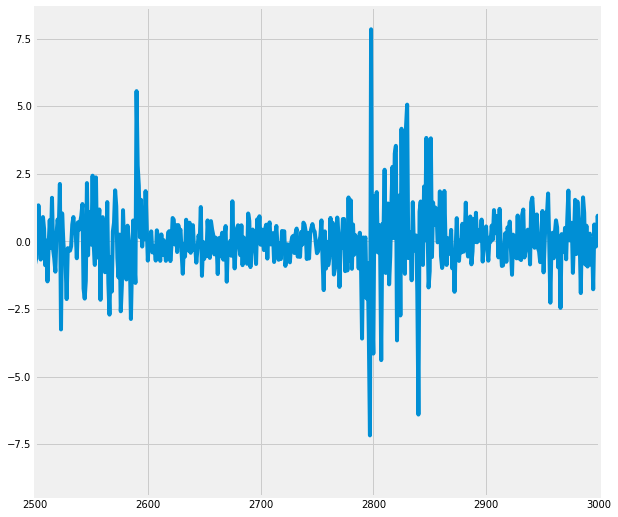

In [87]:
plotUtils.plotFunctionZoom(gas_return, 2500, 3000)

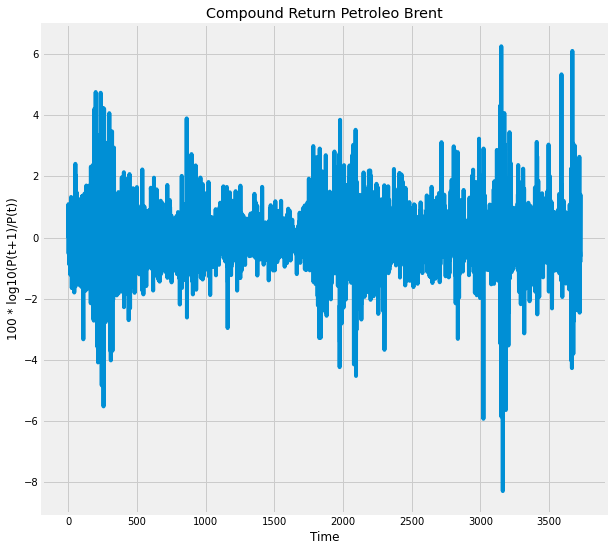

In [15]:
petroleo_brent_return = compoundReturn(last_price_day_petroleo_brent)
petroleo_brent_return[np.logical_not(np.isnan(petroleo_brent_return))]
plotUtils.plotFunction(petroleo_brent_return, "Compound Return Petroleo Brent", "Time", "100 * log10(P(t+1)/P(t))")

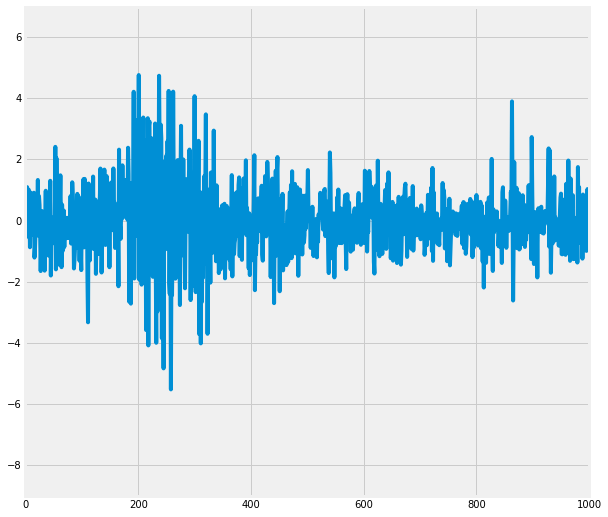

In [90]:
plotUtils.plotFunctionZoom(petroleo_brent_return, 0, 1000)

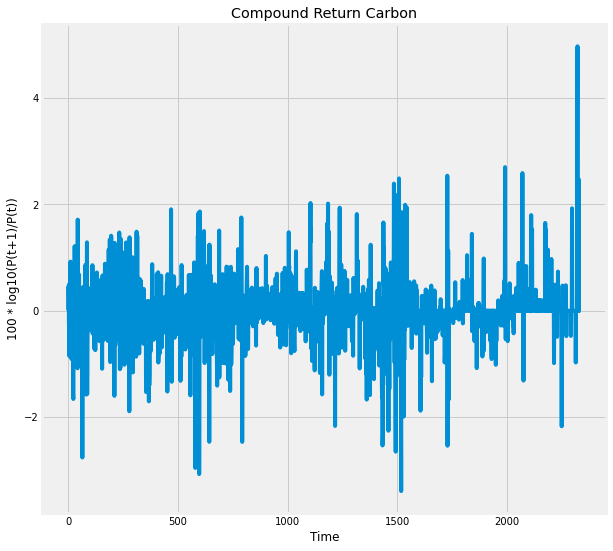

In [16]:
carbon_return = compoundReturn(last_price_day_carbon)
carbon_return[np.logical_not(np.isnan(carbon_return))]
plotUtils.plotFunction(carbon_return, "Compound Return Carbon", "Time", "100 * log10(P(t+1)/P(t))")

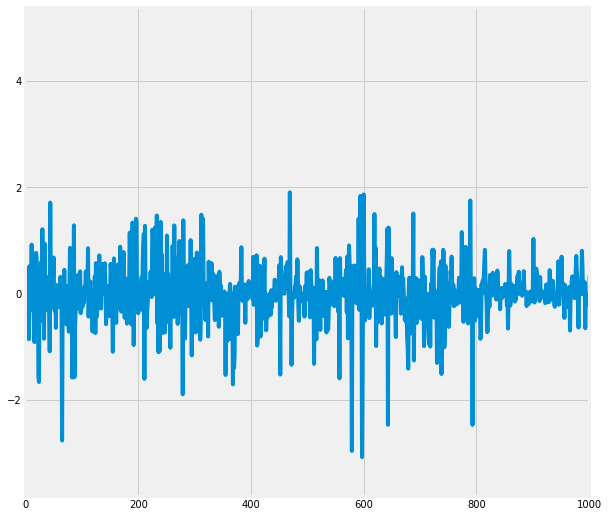

In [93]:
plotUtils.plotFunctionZoom(carbon_return, 0, 1000)

### Volatilidad (rendimientos al cuadrado)

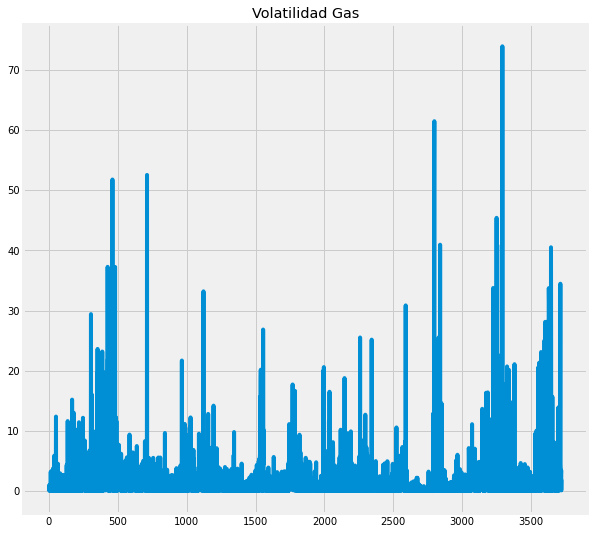

In [95]:
plotUtils.plotFunctionNoTitle(np.square(gas_return), 'Volatilidad Gas')

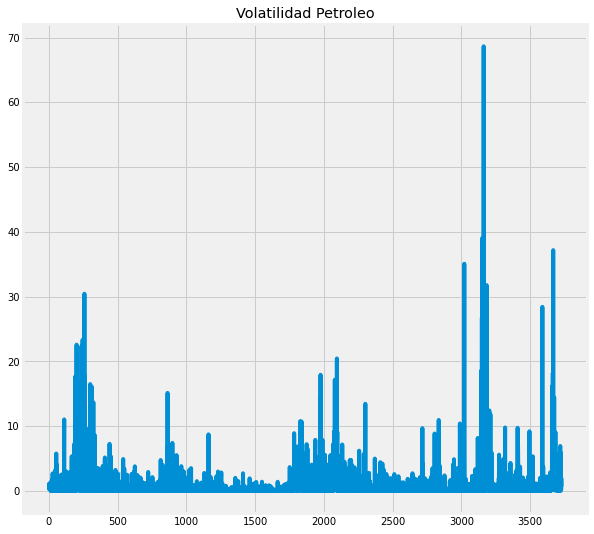

In [96]:
plotUtils.plotFunctionNoTitle(np.square(petroleo_brent_return), 'Volatilidad Petroleo')

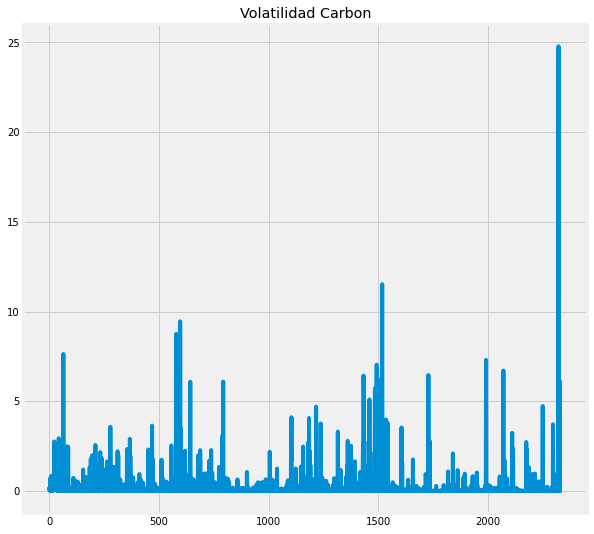

In [97]:
plotUtils.plotFunctionNoTitle(np.square(carbon_return), 'Volatilidad Carbon')

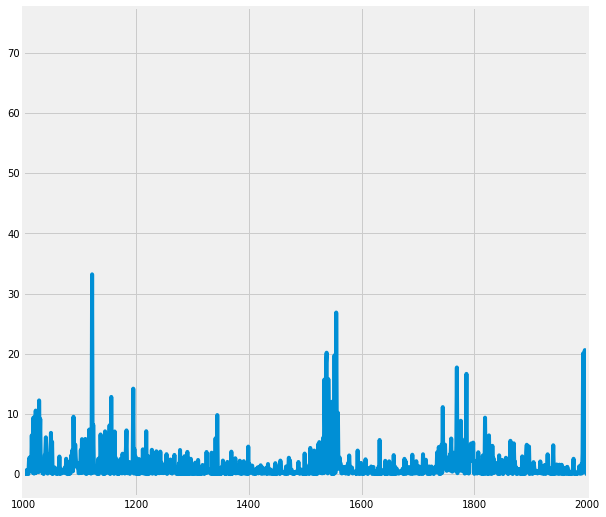

In [98]:
plotUtils.plotFunctionZoom(np.square(gas_return),1000,2000)

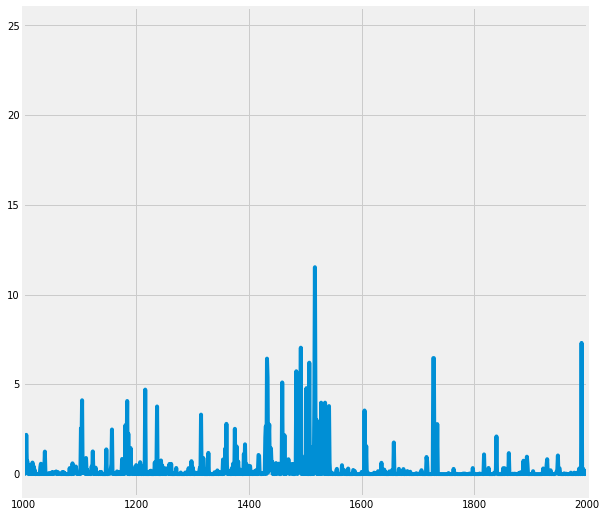

In [100]:
plotUtils.plotFunctionZoom(np.square(carbon_return),1000,2000)

# Descriptive Statistic

## Frequency Distribution Histogram


In [17]:
def frequencyDistribution(compondReturn):
    # Sturge's Rule
    # bins = 1 + 3.322 * np.log10(len(compondReturn))
    # values too littles
    
    fig, ax = plt.subplots(figsize=(9, 9))
    n, bins, patches = ax.hist(compondReturn, round(20))
    ax.set_title('Frequency Histogram', size = 19)
    plt.show()

    fig, ax = plt.subplots(nrows = 2, ncols = 1,figsize=(9, 9))
    ax[0].plot(bins[:len(n)], n)
    ax[1].plot(np.cumsum(n))
    ax[0].set_title('Empirical Cumulative', size = 19)
    ax[1].set_title('Cumulative Sum', size = 19)
    plt.show()

In [18]:
normal = np.random.normal(size=3500)

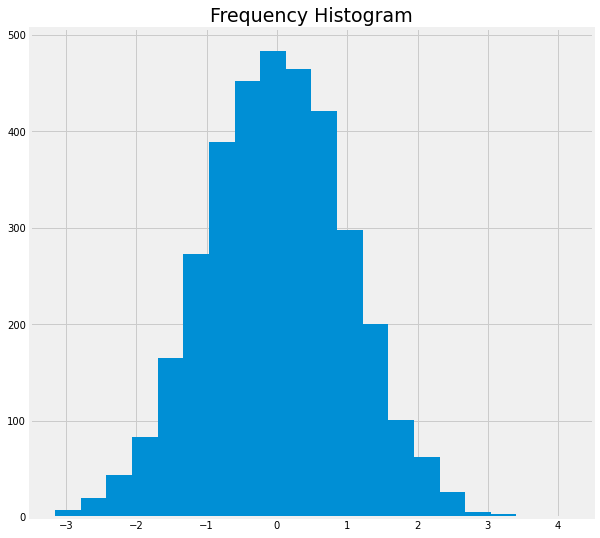

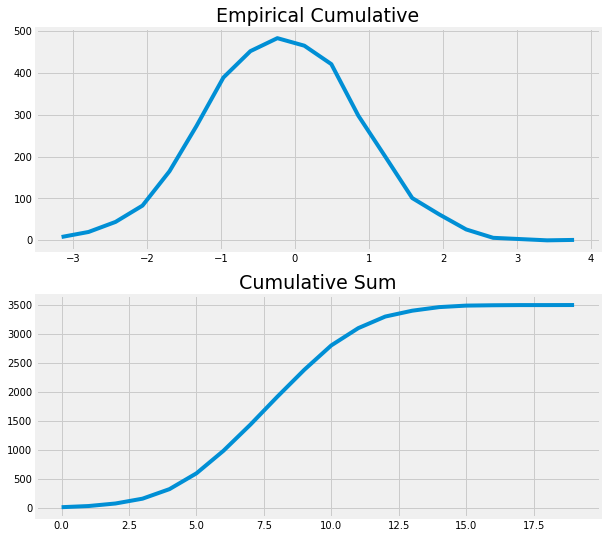

In [19]:
frequencyDistribution(normal)

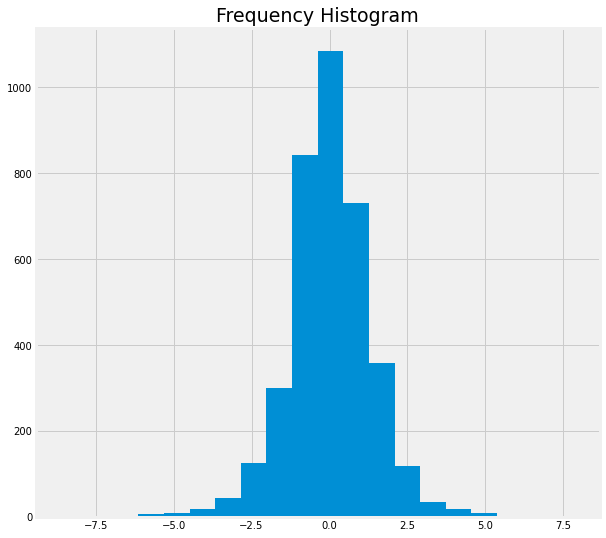

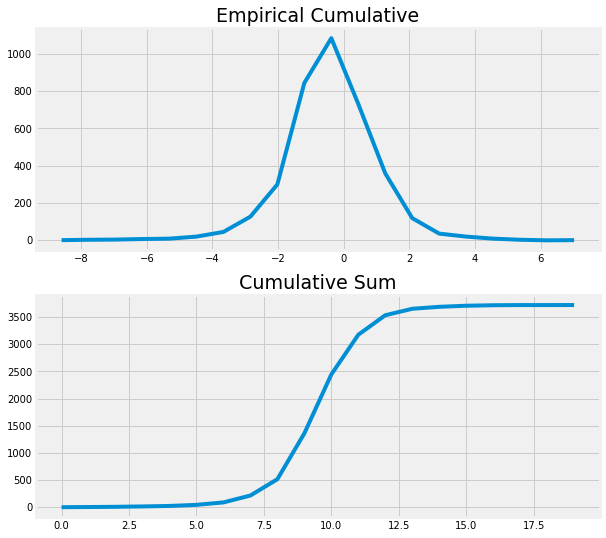

In [20]:
frequencyDistribution(gas_return)

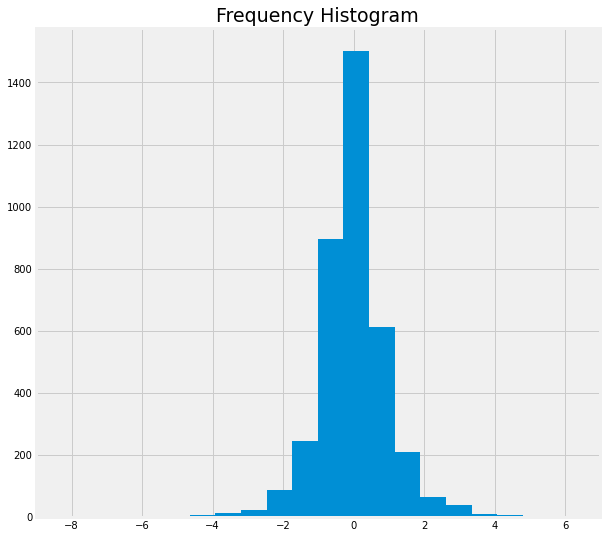

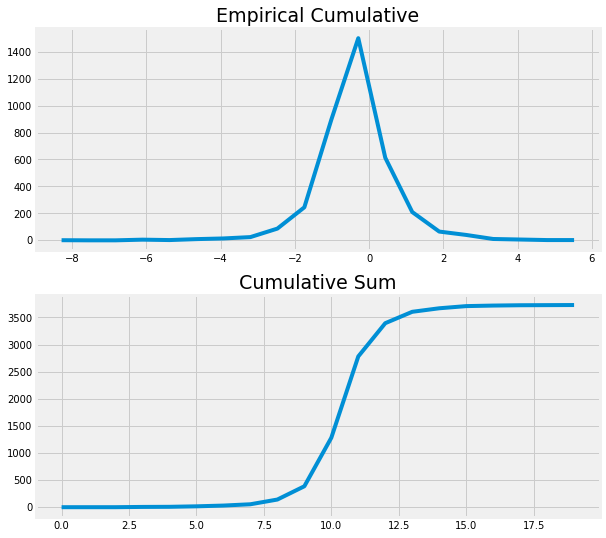

In [21]:
frequencyDistribution(petroleo_brent_return)

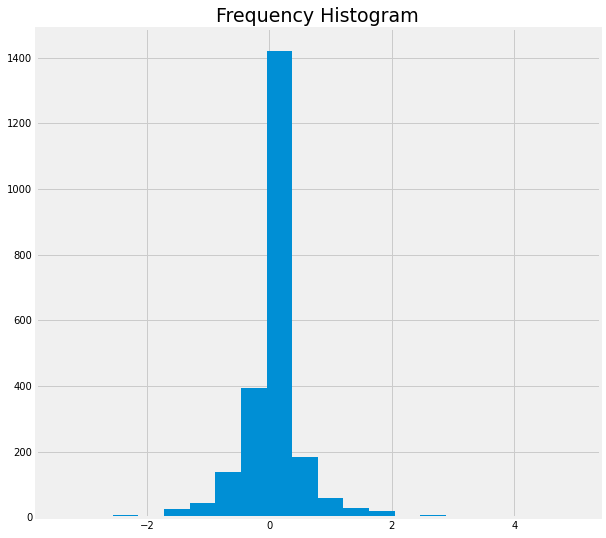

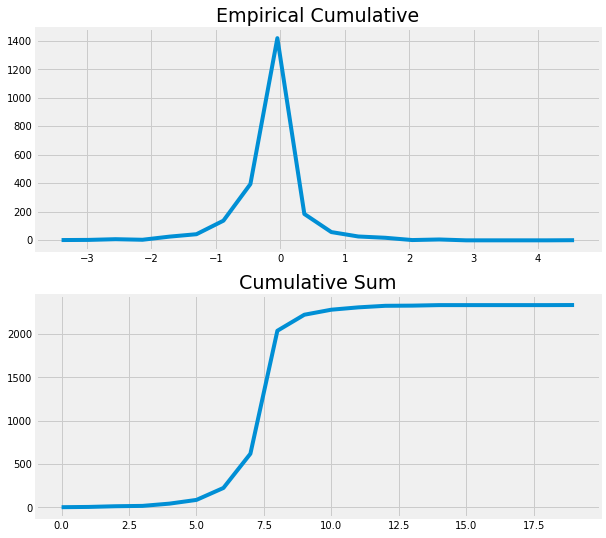

In [22]:
frequencyDistribution(carbon_return)

## Basic Numeric Descriptives


### Mean


In [23]:
def geometricMean(compondReturn):
    # Geometric name cannot be applied negative values
    return sp.stats.mstats.gmean(compondReturn + 20) - 20

In [24]:
def arithmeticMean(compondReturn):
    return np.nanmean(compondReturn)

In [25]:
arithmeticMean(gas_return)

0.0027507368561683885

In [26]:
geometricMean(gas_return)

-0.04510054885609449

In [27]:
arithmeticMean(carbon_return)

0.013667718735343561

In [28]:
geometricMean(carbon_return)

0.007113784050513772

In [29]:
arithmeticMean(petroleo_brent_return)

-0.007968764976951911

In [30]:
geometricMean(petroleo_brent_return)

-0.03418983144521803

### Standard Deviation

In [31]:
def standarDeviation(compondReturn):
    return np.std(compondReturn)

In [32]:
standarDeviation(gas_return)

1.3642329568918585

In [33]:
standarDeviation(petroleo_brent_return)

1.0158586553286482

In [34]:
standarDeviation(carbon_return)

0.5116584328917682

### Max and min

In [35]:
gas_return.max()

7.840977278083475

In [36]:
gas_return.min()

-8.598352606247712

In [37]:
petroleo_brent_return.max()

6.248524997316641

In [38]:
petroleo_brent_return.min()

-8.285210071393177

In [39]:
carbon_return.max()

4.978281580478284

In [40]:
carbon_return.min()

-3.394926662890708

## Swekness

For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [41]:
def skew(compondReturn):
    return stats.skew(compondReturn)

In [42]:
skew(gas_return)

-0.2940957942535622

In [43]:
skew(petroleo_brent_return)

-0.12292407086457838

In [44]:
skew(carbon_return)

0.13497743169892756

## Q-Q Plot

In [45]:
def qqPlot (data, title):
    fig, ax = plt.subplots(figsize=(9, 9))
    stats.probplot(data, dist="norm", plot=pylab)
    ax.set_title('Q-Q plot:' + title)
    plt.show()

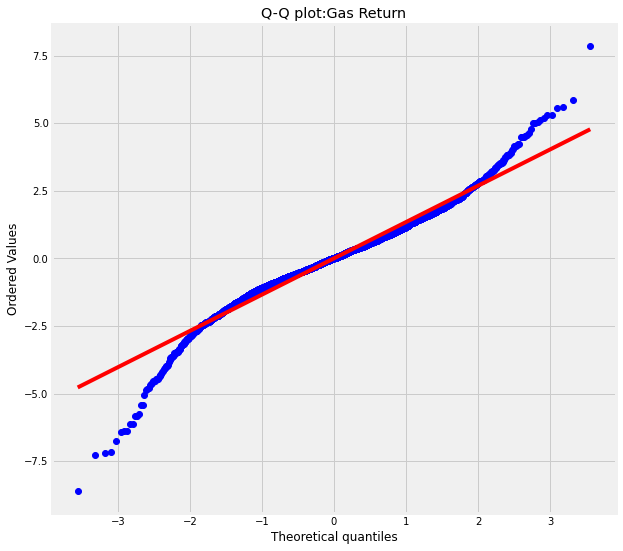

In [46]:
qqPlot(gas_return, 'Gas Return')

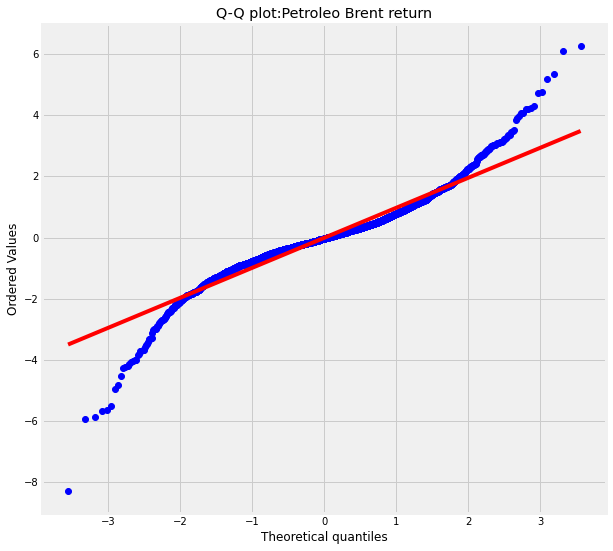

In [47]:
qqPlot(petroleo_brent_return, 'Petroleo Brent return')

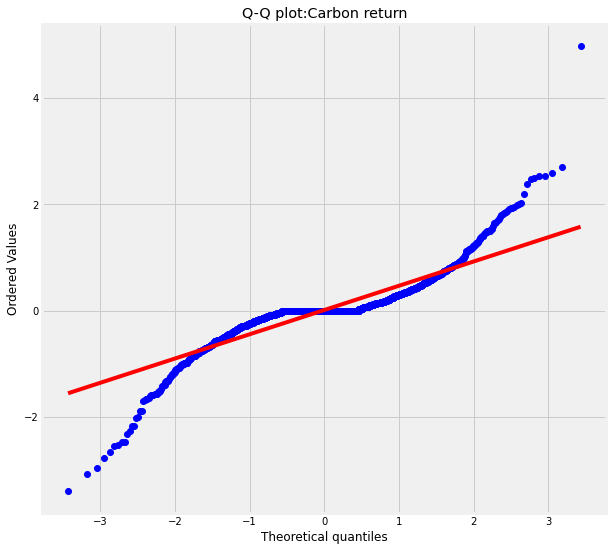

In [48]:
qqPlot(carbon_return, 'Carbon return')

## Jarque-Bera Test

In [49]:
def jarqueBeraTest(data):
    return stats.jarque_bera(data)

In [50]:
jarqueBeraTest(gas_return)

Jarque_beraResult(statistic=1693.4344981517706, pvalue=0.0)

In [51]:
jarqueBeraTest(petroleo_brent_return)

Jarque_beraResult(statistic=5118.285626579595, pvalue=0.0)

In [52]:
jarqueBeraTest(carbon_return)

Jarque_beraResult(statistic=12120.700587813224, pvalue=0.0)

## Kolmogorov-Smirnov Test

In [53]:
def kolmogorovTest(data):
    return stats.kstest(data, 'norm')

In [54]:
kolmogorovTest(gas_return)

KstestResult(statistic=0.04592821495001154, pvalue=2.9206129944446485e-07)

In [55]:
kolmogorovTest(petroleo_brent_return)

KstestResult(statistic=0.08088769717075317, pvalue=1.1226221959148116e-21)

In [56]:
kolmogorovTest(carbon_return)

KstestResult(statistic=0.2500030455812069, pvalue=4.5176633491616394e-129)

## Box plots

In [57]:
def boxPlot(data, title):
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.set_title('Box-plot:' + title)
    ax.boxplot(data)

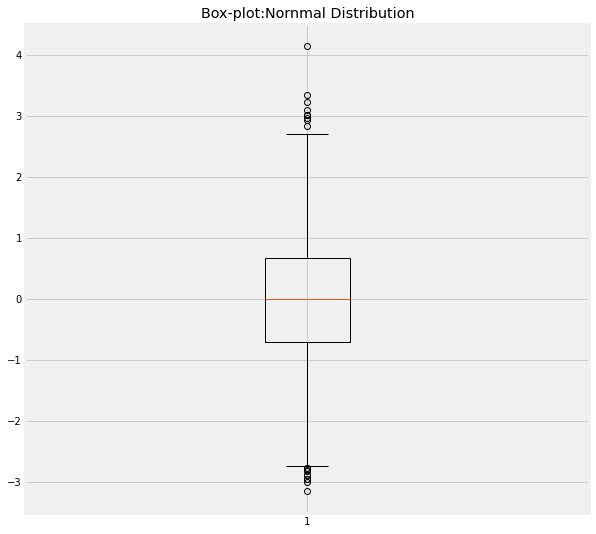

In [58]:
boxPlot(normal, 'Nornmal Distribution')

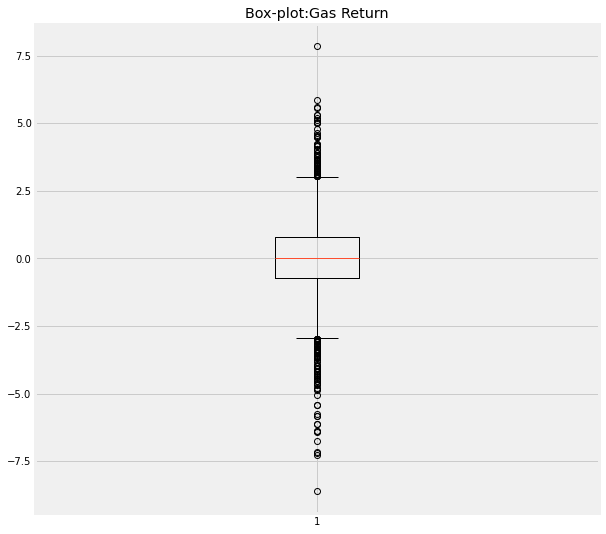

In [59]:
boxPlot(gas_return, 'Gas Return')

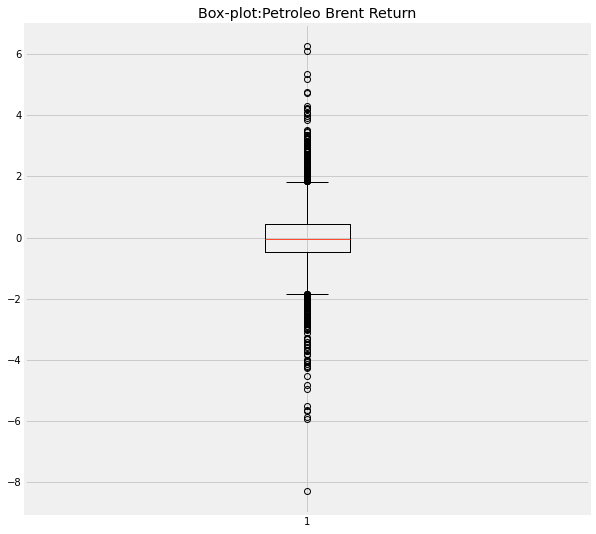

In [60]:
boxPlot(petroleo_brent_return, 'Petroleo Brent Return')

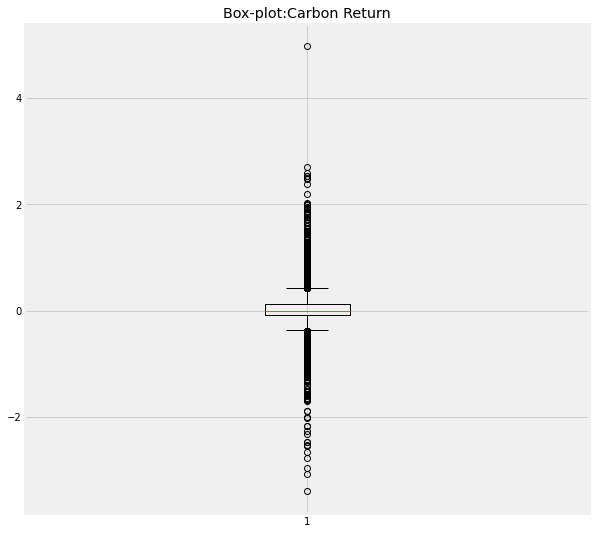

In [61]:
boxPlot(carbon_return, 'Carbon Return')

# Propiedades dinámicas de los rendimientos

## Incorrelación de los rendimientos

### Ljung-Box Test

In [101]:
def ljungBoxTest(data, lags):
    return acorr_ljungbox(data, lags=[lags], return_df=True)

In [110]:
ljungBoxTest(gas_return, 10)

,lb_stat,lb_pvalue
10,32.218287,0.000368


In [106]:
ljungBoxTest(petroleo_brent_return, 100)

,lb_stat,lb_pvalue
100,162.282822,0.000082


In [109]:
ljungBoxTest(carbon_return, 100)

,lb_stat,lb_pvalue
100,173.330301,0.000008


### Correlogramas

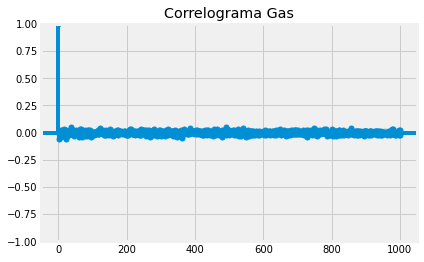

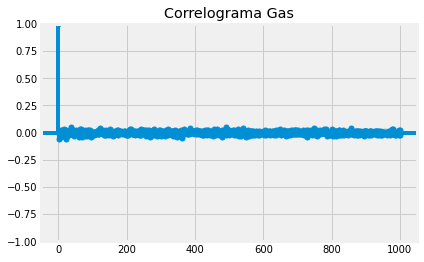

In [118]:
sm.graphics.tsa.plot_acf(x=gas_return, lags=1000, title= 'Correlograma Gas')

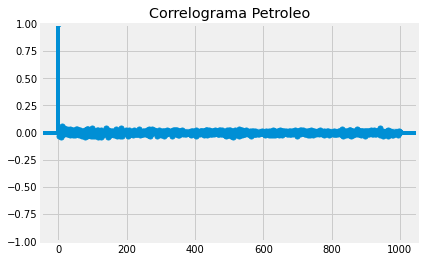

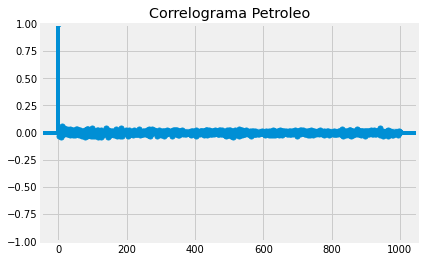

In [117]:
sm.graphics.tsa.plot_acf(x=petroleo_brent_return, lags=1000, title= 'Correlograma Petroleo')


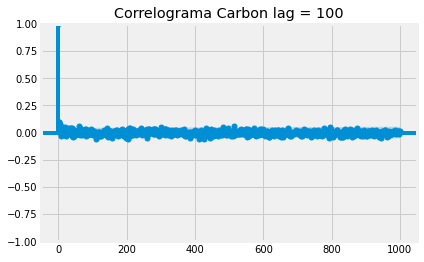

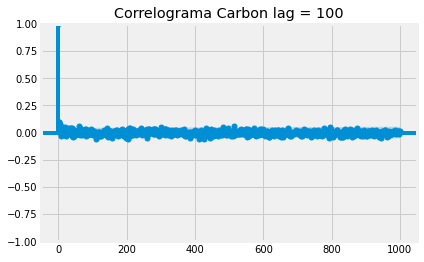

In [120]:
sm.graphics.tsa.plot_acf(x=carbon_return, lags=1000, title= 'Correlograma Carbon lag = 100')

### Correlacion no lineal - Spearman Correlation

In [69]:
def lagging(x, lag):
    return x[:-(lag+1)], x[lag:-1]

In [121]:
def spearman(data, lag):
    x, y = lagging(data, lag)
    coef, _ = stats.spearmanr(x, y)
    return coef

In [122]:
lag10 = spearman(gas_return, 10)
lag100 = spearman(gas_return, 1000)
print('lag10={0} lag1000={1}'.format(lag10, lag100))

lag10=0.019874693182804642 lag1000=0.02610385430769068


In [123]:
lag10 = spearman(petroleo_brent_return, 10)
lag100 = spearman(petroleo_brent_return, 1000)
print('lag10={0} lag1000={1}'.format(lag10, lag100))

lag10=0.04033918343894889 lag1000=-0.0012126046975934712


In [124]:
lag10 = spearman(carbon_return, 10)
lag100 = spearman(carbon_return, 1000)
print('lag10={0} lag1000={1}'.format(lag10, lag100))

lag10=0.008627933047414861 lag1000=0.008115947812093812


###  Efecto de Taylor

In [74]:
def transform(x, exp):
    x = np.absolute(x)
    array = np.empty(len(x))
    for i, value in enumerate(x):
       array[i] = value**exp
    return array

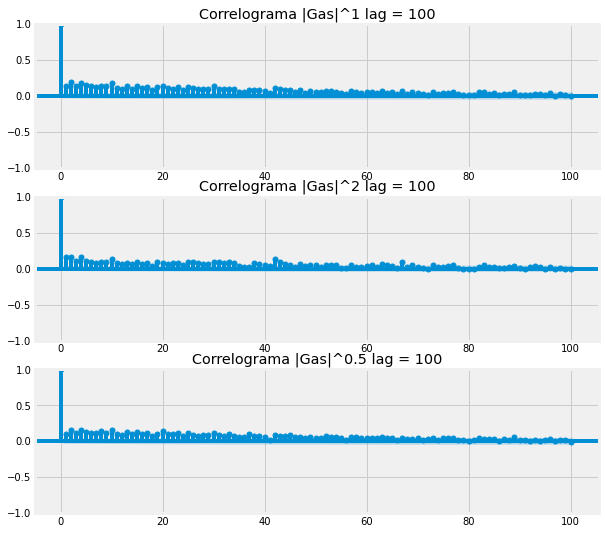

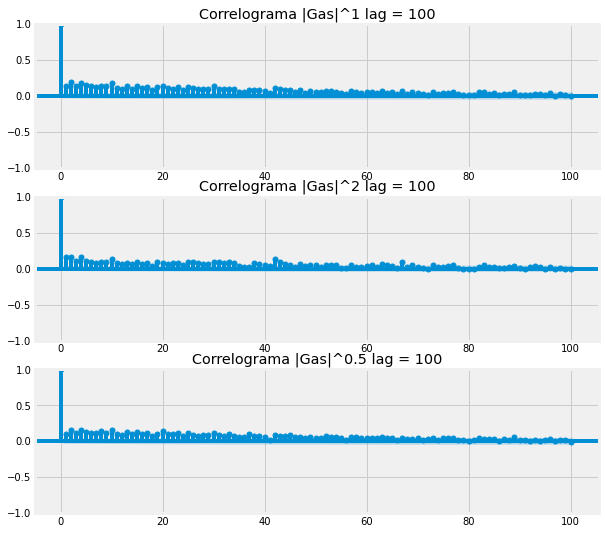

In [75]:
gas1 = np.absolute(gas_return)
gasProc2 = transform(gas_return, 2)
gasProc05 = transform(gas_return, .5)

fig, ax = plt.subplots(3, figsize=(9, 9))
sm.graphics.tsa.plot_acf(x=gas1, lags=100, ax=ax[0], title= 'Correlograma |Gas|^1 lag = 100')
sm.graphics.tsa.plot_acf(x=gasProc2, lags=100, ax=ax[1], title= 'Correlograma |Gas|^2 lag = 100')
sm.graphics.tsa.plot_acf(x=gasProc05, lags=100, ax=ax[2], title= 'Correlograma |Gas|^0.5 lag = 100')

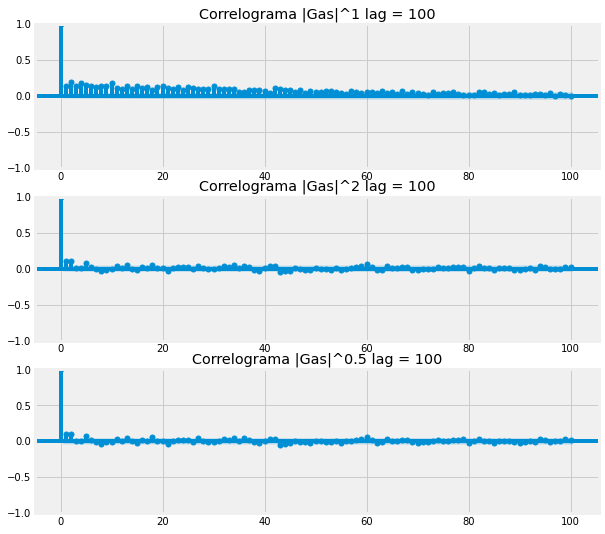

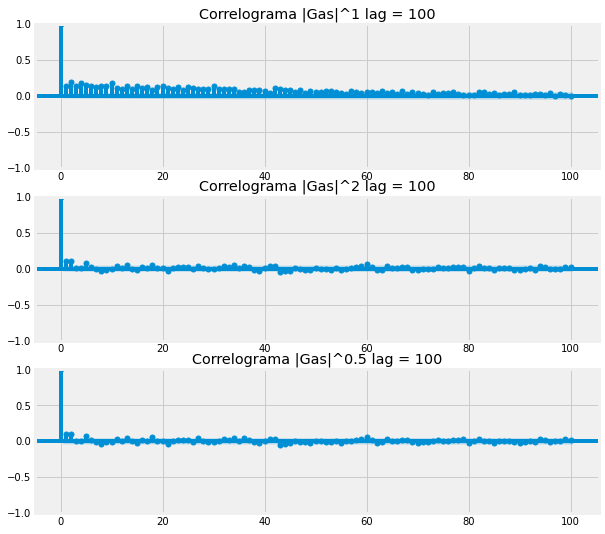

In [76]:
petroleo1 = np.absolute(petroleo_brent_return)
petroleoProc = transform(petroleo_brent_return, 2)
gasProc = transform(petroleo_brent_return, .5)

fig, ax = plt.subplots(3, figsize=(9, 9))
sm.graphics.tsa.plot_acf(x=gas1, lags=100, ax=ax[0], title= 'Correlograma |Gas|^1 lag = 100')
sm.graphics.tsa.plot_acf(x=carbon_return, lags=100, ax=ax[1], title= 'Correlograma |Gas|^2 lag = 100')
sm.graphics.tsa.plot_acf(x=carbon_return, lags=100, ax=ax[2], title= 'Correlograma |Gas|^0.5 lag = 100')

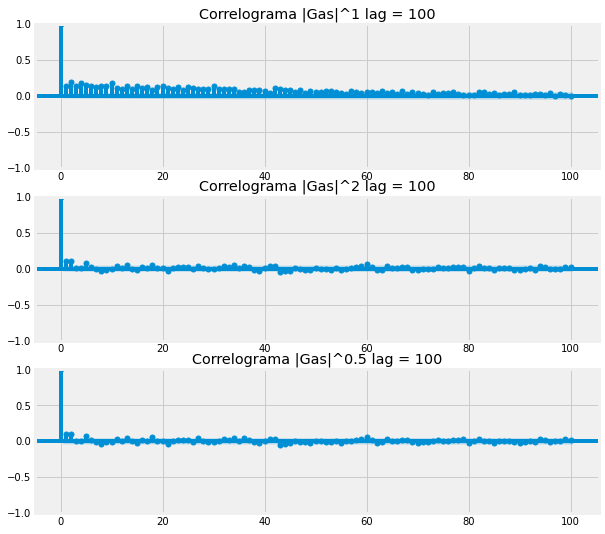

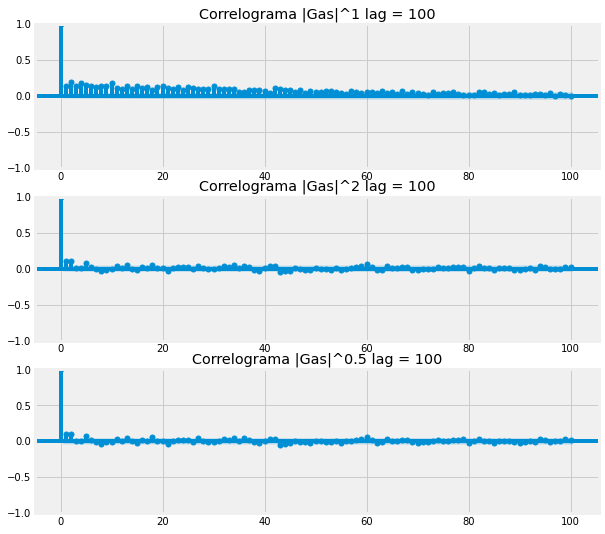

In [77]:
gas1 = np.absolute(gas_return)
gasProc = transform(gas_return, 2)
gasProc = transform(gas_return, .5)

fig, ax = plt.subplots(3, figsize=(9, 9))
sm.graphics.tsa.plot_acf(x=gas1, lags=100, ax=ax[0], title= 'Correlograma |Gas|^1 lag = 100')
sm.graphics.tsa.plot_acf(x=carbon_return, lags=100, ax=ax[1], title= 'Correlograma |Gas|^2 lag = 100')
sm.graphics.tsa.plot_acf(x=carbon_return, lags=100, ax=ax[2], title= 'Correlograma |Gas|^0.5 lag = 100')

In [78]:
def taylorEffect(data):
    fig, ax = plt.subplots(figsize=(12, 12))
    array = np.empty(3000)
    aX = np.arange(3000)/1000
    for a in np.arange(1,100, 10):
        for b in np.arange(0,3000):
            proc = transform(data, b/1000)
            x,y = lagging(proc, a)
            array[b], _ = stats.pearsonr(x, y)
        ax.plot(aX, array)
    

/Users/cesarredondourdiales/Workdir/tfg/python-virtual-environments/env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


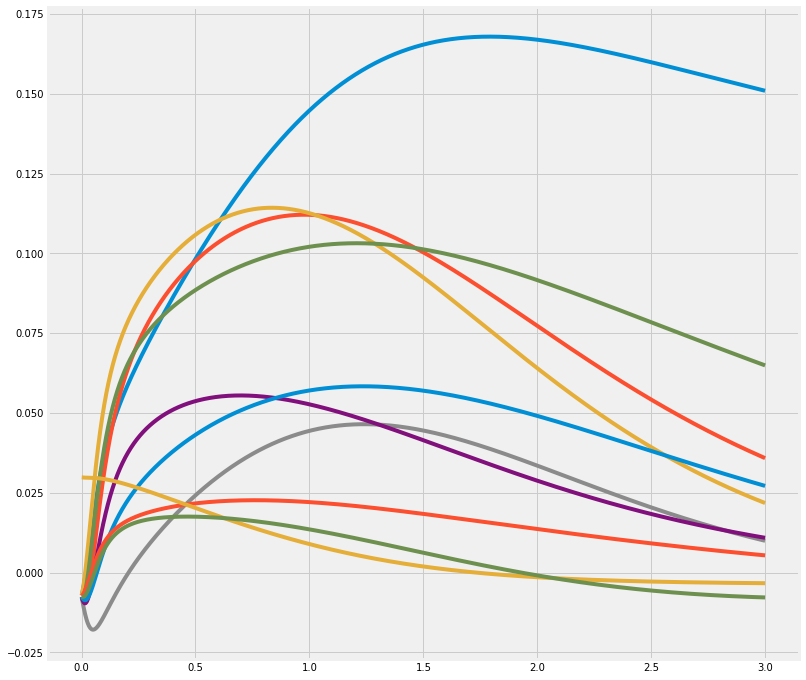

In [79]:
taylorEffect(gas_return)
    

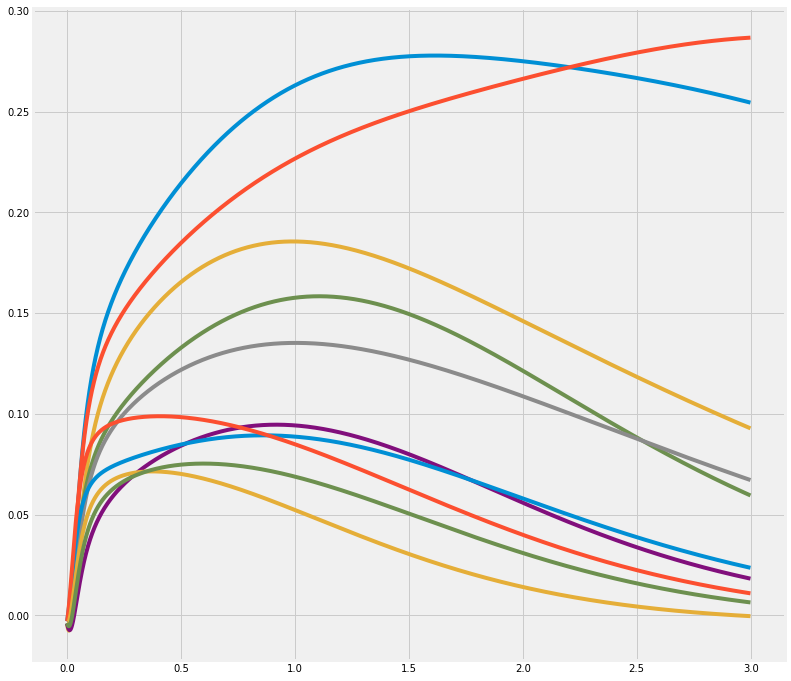

In [80]:
taylorEffect(petroleo_brent_return)

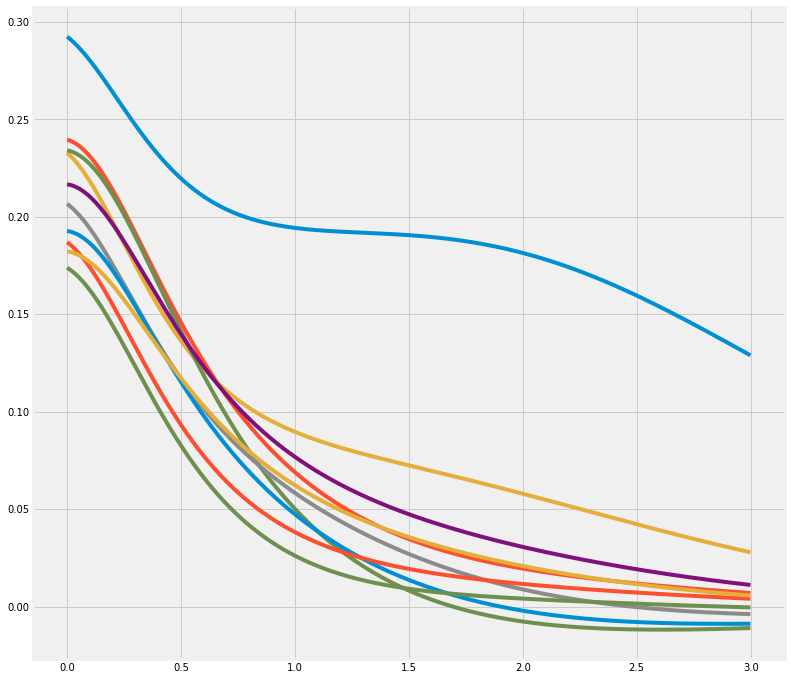

In [81]:
taylorEffect(carbon_return)

## Leverage Effect


In [82]:
# De manera manual...
# def leverageEffect(data, title):
#     array = np.empty(100)
#     for i in np.arange(1,100):
#        x, y = lagging(data, i)
#        y = np.square(y)
#        coef, _ = sm.tsa.stattools.ccf (x, y)
#        array[i] = coef
#     array = list(filter(lambda t: t <= 1, array))
#     plotUtils.plotFunctionNoTitle(array, title)

In [83]:
def leverageEffect(data, title):
    array = sm.tsa.stattools.ccf(data, np.square(data), adjusted=False)
    array = list(filter(lambda t: t <= 1, array))
    plotUtils.plotFunctionNoTitle(array, title)


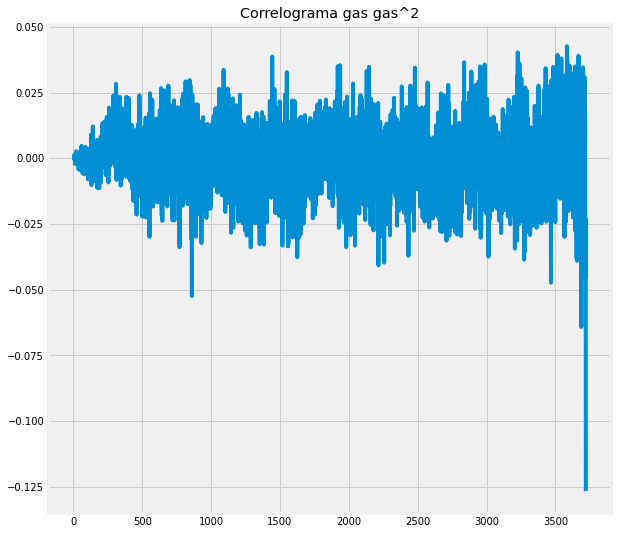

In [84]:
leverageEffect(gas_return, 'Correlograma gas gas^2')

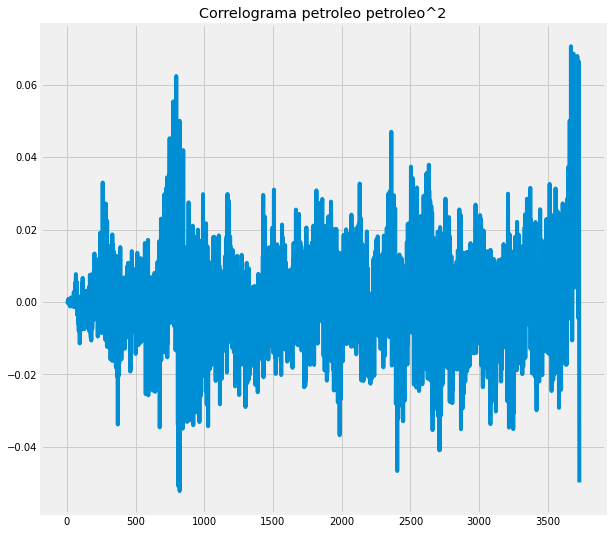

In [85]:
leverageEffect(petroleo_brent_return, 'Correlograma petroleo petroleo^2')

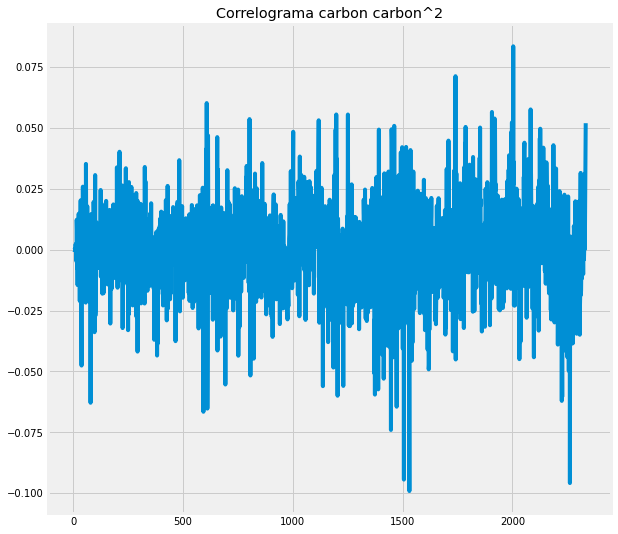

In [86]:
leverageEffect(carbon_return, 'Correlograma carbon carbon^2')